In [8]:
import torch
from diffusers import FluxPipeline

import torch
import matplotlib.pyplot as plt
from PIL import Image

## Testing flux

In [1]:


pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image.save("flux-dev.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/50 [00:00<?, ?it/s]

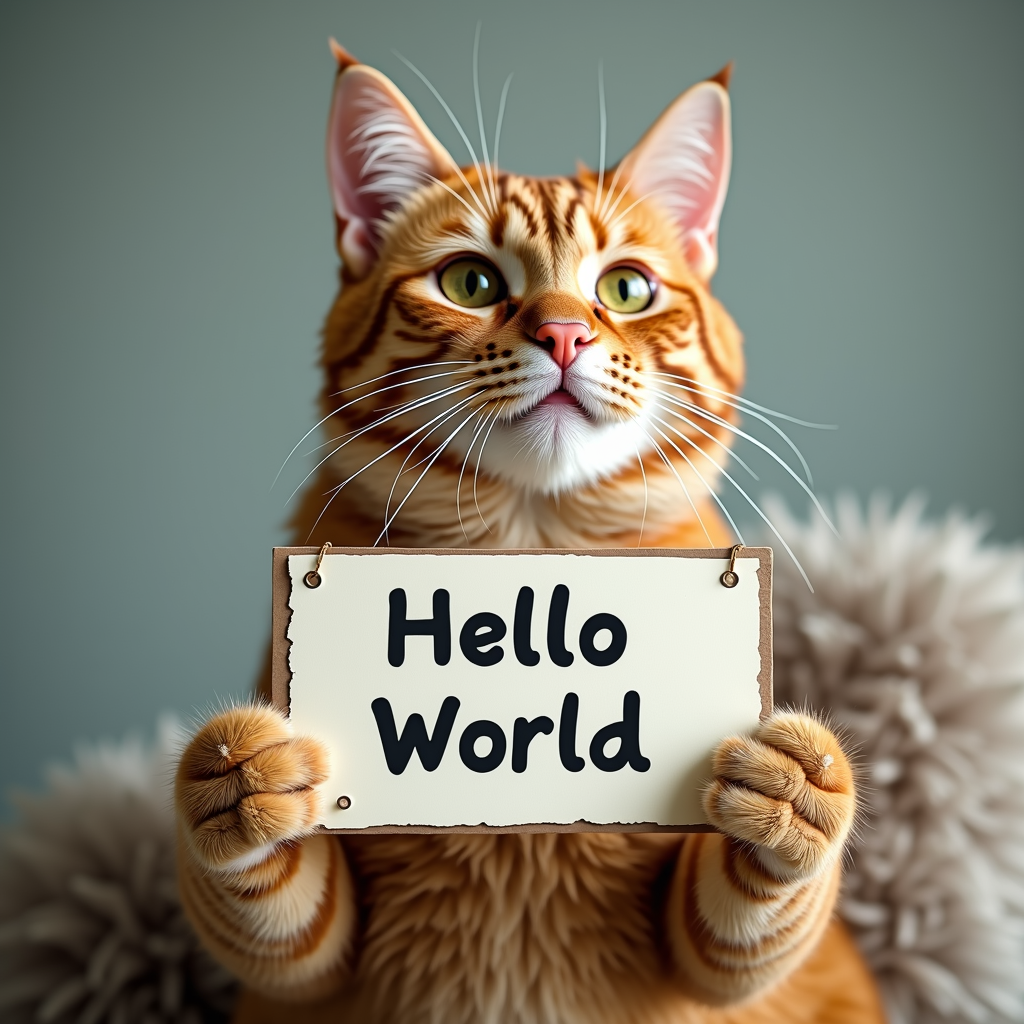

In [2]:
image

In [4]:
prompt = "Letter 'J' written in the Desert Mirage style. image should contain exactlyone letter: 'J'. The background is white!"

In [5]:
%%time

import torch
import matplotlib.pyplot as plt
from PIL import Image

# List of letters to generate
letters = ["A", "J", "K", "Q"]

# Generate images for each letter
images = []
for letter in letters:
    prompt = f"Letter '{letter}' written in the Desert Mirage style. image should contain exactly one letter: '{letter}'. The background is white!"
    image = pipe(
        prompt,
        height=1024,
        width=1024,
        guidance_scale=3.5,
        num_inference_steps=50,
        max_sequence_length=512,
        generator=torch.Generator("cpu").manual_seed(0)
    ).images[0]
    images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 3min 50s, sys: 2min 31s, total: 6min 22s
Wall time: 6min 22s


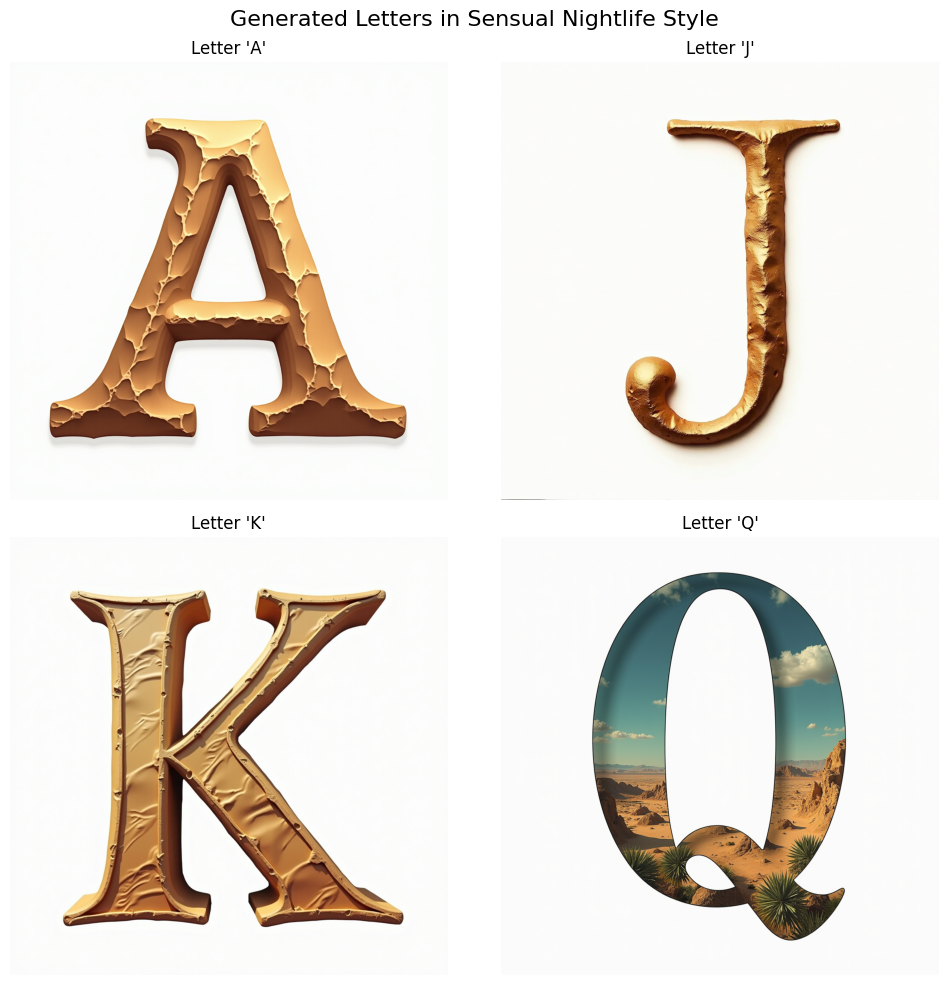

In [6]:
# Display images in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Generated Letters in Sensual Nightlife Style", fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.axis("off")
    ax.set_title(f"Letter '{letters[i]}'")

plt.tight_layout()
plt.show()

In [7]:
%%time

import torch
import matplotlib.pyplot as plt
from PIL import Image

# List of letters to generate

def generate_show_letters(style: str):

    letters = ["A", "J", "K", "Q"]
    
    # Generate images for each letter
    images = []
    for letter in letters:
        prompt = f"Letter '{letter}' written in the {style} style. image should contain exactly one letter: '{letter}'. The background is white!"
        image = pipe(
            prompt,
            height=1024,
            width=1024,
            guidance_scale=3.5,
            num_inference_steps=50,
            max_sequence_length=512,
            generator=torch.Generator("cpu").manual_seed(0)
        ).images[0]
        images.append(image)

    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f"Generated Letters in {style} style.", fontsize=16)
    
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis("off")
        ax.set_title(f"Letter '{letters[i]}'")
    
    plt.tight_layout()
    plt.show()

CPU times: user 6 μs, sys: 5 μs, total: 11 μs
Wall time: 13.4 μs


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

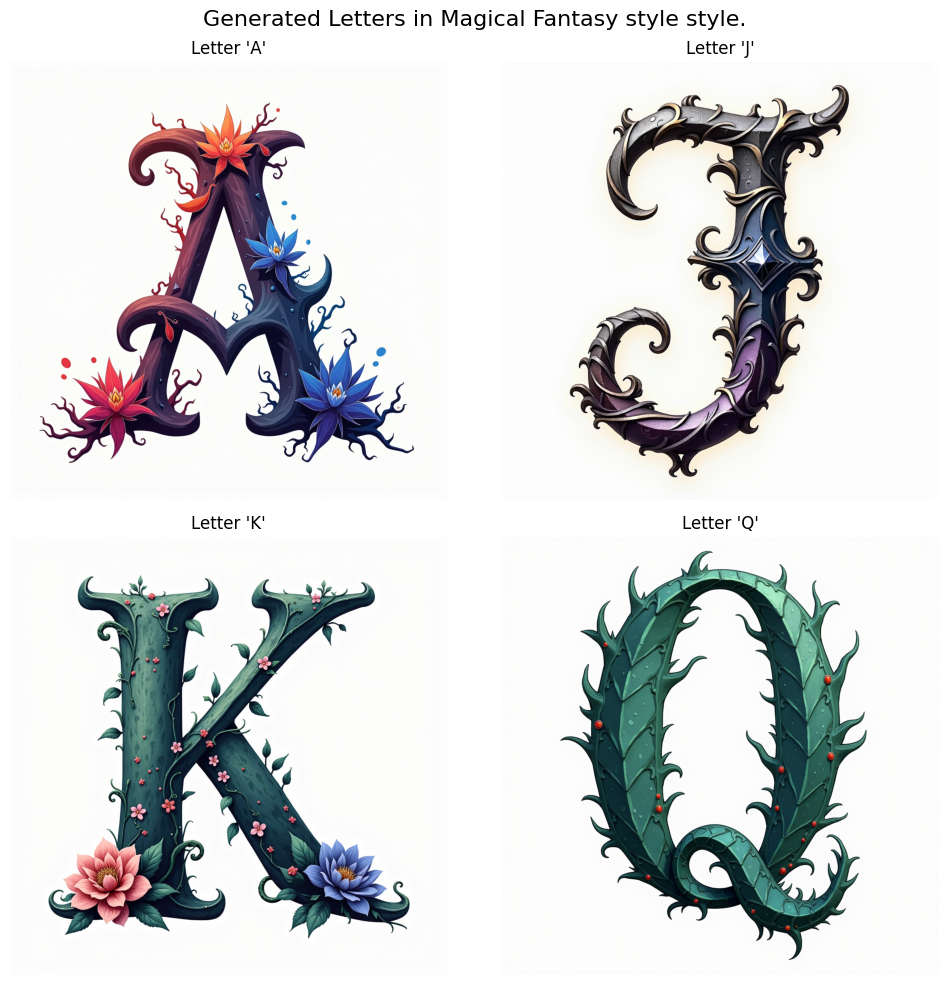

CPU times: user 3min 56s, sys: 2min 24s, total: 6min 21s
Wall time: 6min 22s


In [8]:
%%time
style = 'Magical Fantasy style'
generate_show_letters(style=style)

### Generating with custom prompt

In [6]:
def generate_with_custom_prompt(custom_prompt: str):

    letters = ["A", "J", "K", "Q"]
    
    # Generate images for each letter
    images = []
    for letter in letters:
        prompt = custom_prompt.format(letter=letter)
        print(prompt)
        image = pipe(
            prompt,
            height=1024,
            width=1024,
            guidance_scale=3.5,
            num_inference_steps=50,
            max_sequence_length=512,
            generator=torch.Generator("cpu").manual_seed(0)
        ).images[0]
        images.append(image)

    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f"Generated Letters in {style} style.", fontsize=16)
    
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis("off")
        ax.set_title(f"Letter '{letters[i]}'")
    
    plt.tight_layout()
    plt.show()
    return images

In [7]:
new_prompt = "Create a stylized '{letter}' on a clean white background. The letter '{letter}' should appear in a magical, mystical style inspired by the Harry Potter universe. The design should incorporate subtle glowing effects, mystical symbols, and elegant curves, capturing the essence of fantasy and magic. Use dark and metallic tones, such as deep blacks, silvers, and hints of gold, to enhance the enchanting and mysterious appearance. Ensure the letter '{letter}' has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. The design should be balanced and easily recognizable, with each letter in a consistent size and style."

images = generate_with_custom_prompt(custom_prompt=new_prompt)

Token indices sequence length is longer than the specified maximum sequence length for this model (131 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["to enhance the enchanting and mysterious appearance. ensure the letter'a'has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. the design should be balanced and easily recognizable, with each letter in a consistent size and style."]


Create a stylized 'A' on a clean white background. The letter 'A' should appear in a magical, mystical style inspired by the Harry Potter universe. The design should incorporate subtle glowing effects, mystical symbols, and elegant curves, capturing the essence of fantasy and magic. Use dark and metallic tones, such as deep blacks, silvers, and hints of gold, to enhance the enchanting and mysterious appearance. Ensure the letter 'A' has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. The design should be balanced and easily recognizable, with each letter in a consistent size and style.


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["to enhance the enchanting and mysterious appearance. ensure the letter'j'has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. the design should be balanced and easily recognizable, with each letter in a consistent size and style."]


Create a stylized 'J' on a clean white background. The letter 'J' should appear in a magical, mystical style inspired by the Harry Potter universe. The design should incorporate subtle glowing effects, mystical symbols, and elegant curves, capturing the essence of fantasy and magic. Use dark and metallic tones, such as deep blacks, silvers, and hints of gold, to enhance the enchanting and mysterious appearance. Ensure the letter 'J' has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. The design should be balanced and easily recognizable, with each letter in a consistent size and style.


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["to enhance the enchanting and mysterious appearance. ensure the letter'k'has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. the design should be balanced and easily recognizable, with each letter in a consistent size and style."]


Create a stylized 'K' on a clean white background. The letter 'K' should appear in a magical, mystical style inspired by the Harry Potter universe. The design should incorporate subtle glowing effects, mystical symbols, and elegant curves, capturing the essence of fantasy and magic. Use dark and metallic tones, such as deep blacks, silvers, and hints of gold, to enhance the enchanting and mysterious appearance. Ensure the letter 'K' has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. The design should be balanced and easily recognizable, with each letter in a consistent size and style.


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["to enhance the enchanting and mysterious appearance. ensure the letter'q'has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. the design should be balanced and easily recognizable, with each letter in a consistent size and style."]


Create a stylized 'Q' on a clean white background. The letter 'Q' should appear in a magical, mystical style inspired by the Harry Potter universe. The design should incorporate subtle glowing effects, mystical symbols, and elegant curves, capturing the essence of fantasy and magic. Use dark and metallic tones, such as deep blacks, silvers, and hints of gold, to enhance the enchanting and mysterious appearance. Ensure the letter 'Q' has intricate detailing, with an aged, slightly weathered texture that evokes an ancient, magical atmosphere. The design should be balanced and easily recognizable, with each letter in a consistent size and style.


  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'plt' is not defined

In [ ]:
prompt = f"Letter '{letter}' written in the {style} style. image should contain exactly one letter: '{letter}'. The background is white!"